In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
with open('wildfires_training.txt') as f:
    training_data = f.readlines()

In [5]:
with open('wildfires_test.txt') as f:
    testing_data = f.readlines()

In [6]:
training_data[:8]

['no   \t2015\t28\t59\t0\t8.06\t3.47\t01\t06\t19\n',
 'no   \t2010\t30\t61\t1.3\t8.17\t4.03\t02\t06\t13\n',
 'no   \t2009\t26\t83\t13.1\t8.08\t3.59\t03\t06\t22\n',
 'no   \t2017\t25\t87\t2.5\t7.18\t2.42\t04\t06\t15\n',
 'no   \t2014\t28\t77\t0\t14.98\t4.63\t05\t06\t18\n',
 'yes   \t2008\t30\t67\t0\t22.71\t7.97\t06\t06\t14\n',
 'yes   \t2013\t32\t52\t0\t30.98\t11.86\t07\t06\t14\n',
 'yes   \t2009\t29\t72\t0\t38.66\t14.31\t08\t06\t17\n']

# PREPROCESSING

In [7]:
train_data = []
for i in training_data:
    train_data.append(i.split())

In [8]:
test_data= []
for i in testing_data:
    test_data.append(i.split())

In [9]:
print(train_data[:3])
print(test_data[:3])

[['no', '2015', '28', '59', '0', '8.06', '3.47', '01', '06', '19'], ['no', '2010', '30', '61', '1.3', '8.17', '4.03', '02', '06', '13'], ['no', '2009', '26', '83', '13.1', '8.08', '3.59', '03', '06', '22']]
[['no', '2015', '33', '68', '4.5', '9.12', '5.09', '19', '06', '16'], ['yes', '2009', '28', '56', '0', '38.17', '21.21', '12', '06', '18'], ['no', '2017', '30', '64', '0.6', '15.38', '6.24', '24', '09', '19']]


In [10]:
np.array(train_data).shape

(154, 10)

In [11]:
np.array(test_data).shape

(50, 10)

In [12]:
attributes = ['fire', 'year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']

In [13]:
attributes

['fire',
 'year',
 'temp',
 'humidity',
 'rainfall',
 'drought_code',
 'buildup_index',
 'day',
 'month',
 'wind_speed']

In [14]:
train_set = pd.DataFrame(data = np.array(train_data), columns=attributes)
test_set = pd.DataFrame(data = np.array(test_data), columns=attributes)

In [15]:
train_set.head(5)

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0,8.06,3.47,01,06,19
1,no,2010,30,61,1.3,8.17,4.03,02,06,13
2,no,2009,26,83,13.1,8.08,3.59,03,06,22
3,no,2017,25,87,2.5,7.18,2.42,04,06,15
4,no,2014,28,77,0,14.98,4.63,05,06,18


In [16]:
test_set.head(5)

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,33,68,4.5,9.12,5.09,19,06,16
1,yes,2009,28,56,0,38.17,21.21,12,06,18
2,no,2017,30,64,0.6,15.38,6.24,24,09,19
3,no,2007,23,74,8.3,7.36,2.27,14,09,28
4,no,2017,31,72,0.3,30.47,5.63,07,09,17


In [17]:
attributes.pop(0)     #dropping fire before applying float to the rest

'fire'

In [18]:
for i in attributes:
    train_set[i] = train_set[i].apply(lambda x: float(x))

In [19]:
for i in attributes:
    test_set[i] = train_set[i].apply(lambda x: float(x))

In [20]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fire           50 non-null     object 
 1   year           50 non-null     float64
 2   temp           50 non-null     float64
 3   humidity       50 non-null     float64
 4   rainfall       50 non-null     float64
 5   drought_code   50 non-null     float64
 6   buildup_index  50 non-null     float64
 7   day            50 non-null     float64
 8   month          50 non-null     float64
 9   wind_speed     50 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.0+ KB


In [21]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fire           154 non-null    object 
 1   year           154 non-null    float64
 2   temp           154 non-null    float64
 3   humidity       154 non-null    float64
 4   rainfall       154 non-null    float64
 5   drought_code   154 non-null    float64
 6   buildup_index  154 non-null    float64
 7   day            154 non-null    float64
 8   month          154 non-null    float64
 9   wind_speed     154 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.2+ KB


In [22]:
train_set.isnull().sum()

fire             0
year             0
temp             0
humidity         0
rainfall         0
drought_code     0
buildup_index    0
day              0
month            0
wind_speed       0
dtype: int64

In [23]:
train_set.describe()

,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,2012.058442,31.545455,63.071429,0.855844,48.146299,16.285065,15.077922,7.603896,16.383117
std,3.355294,3.952481,16.038804,2.246798,47.348331,14.346991,8.085760,1.217620,3.218001
min,2007.000000,22.000000,21.000000,0.000000,7.180000,1.320000,1.000000,6.000000,6.000000
25%,2009.000000,29.000000,52.000000,0.000000,9.720000,5.797500,9.000000,6.000000,14.000000
50%,2012.000000,31.000000,64.000000,0.000000,31.330000,11.450000,15.000000,8.000000,16.000000
75%,2015.000000,34.000000,77.000000,0.600000,65.257500,22.775000,21.000000,9.000000,18.750000
max,2017.000000,43.000000,92.000000,16.800000,221.350000,67.720000,31.000000,9.000000,30.000000


In [24]:
train_set.shape

(154, 10)

<AxesSubplot:xlabel='fire', ylabel='count'>

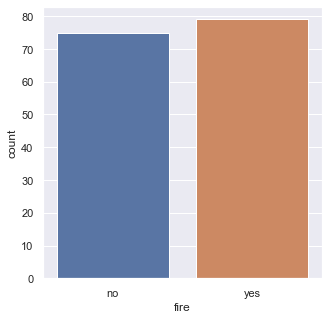

In [25]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5))
sns.countplot(train_set['fire'])

Since the 'Yes' and 'No' are almost evenly distributed, the data is fairly consistant and we can expect a good result

In [26]:
train_set.corr()

,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
year,1.000000,-0.044804,0.066235,0.060774,-0.091232,-0.093823,-0.122311,-0.031092,-0.005719
temp,-0.044804,1.000000,-0.653254,-0.372333,0.478858,0.537869,0.007046,0.058768,-0.208724
humidity,0.066235,-0.653254,1.000000,0.301330,-0.312201,-0.424672,-0.065914,-0.178932,0.286926
rainfall,0.060774,-0.372333,0.301330,1.000000,-0.292643,-0.288991,-0.074749,-0.002612,0.181072
drought_code,-0.091232,0.478858,-0.312201,-0.292643,1.000000,0.965923,0.474956,0.179278,0.065548
buildup_index,-0.093823,0.537869,-0.424672,-0.288991,0.965923,1.000000,0.450965,0.188122,0.014856
day,-0.122311,0.007046,-0.065914,-0.074749,0.474956,0.450965,1.000000,0.264052,0.037277
month,-0.031092,0.058768,-0.178932,-0.002612,0.179278,0.188122,0.264052,1.000000,-0.062769
wind_speed,-0.005719,-0.208724,0.286926,0.181072,0.065548,0.014856,0.037277,-0.062769,1.000000


<AxesSubplot:>

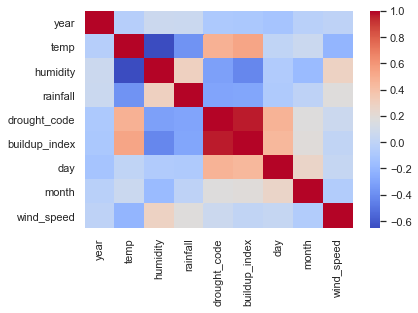

In [27]:
sns.heatmap(train_set.corr(), cmap='coolwarm')

We have established that all the features are not corelated to a degree that there will be redundancy in the data. Hence, no cleanup is required.

In [28]:
X = train_set.drop('fire', axis=1)
y = train_set['fire']

# ID3 Classification

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [31]:
dt.predict(test_set.iloc[:7, 1:])

array(['no', 'no', 'no', 'no', 'no', 'yes', 'yes'], dtype=object)

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt

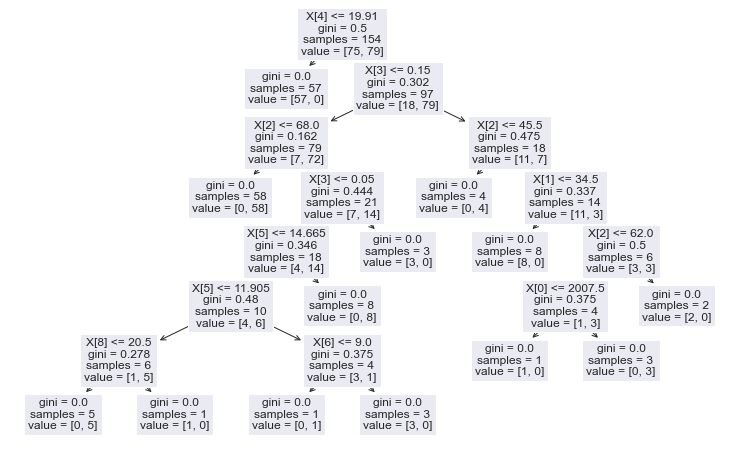

In [33]:
plt.figure(figsize=(13,8))  
a = tree.plot_tree(dt,fontsize=12)

In [34]:
from sklearn.metrics import accuracy_score


In [35]:
X_test = test_set.drop('fire', axis=1)
y_test = test_set['fire']

In [36]:
dt_predicted = dt.predict(X_test)
dt_predicted_train=dt.predict(X)

# Accuracy, F1 score and confusion metrix plotted for the test and training set of the Decision Tree

In [37]:

accuracy_score(y_test,dt_predicted)

0.62

In [38]:
accuracy_score(y,dt_predicted_train)

1.0

In [39]:
from sklearn.metrics import f1_score


In [40]:
f1_score(y_test,dt_predicted,average='macro')

0.6198479391756703

In [41]:
f1_score(y,dt_predicted_train,average='macro')

1.0

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dt_predicted)

array([[16,  6],
       [13, 15]], dtype=int64)

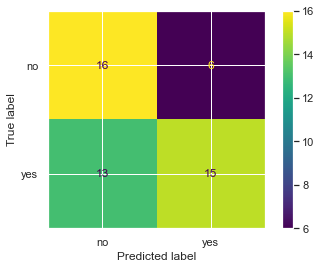

In [43]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(dt, X_test, y_test)
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,dt_predicted_train)

array([[75,  0],
       [ 0, 79]], dtype=int64)

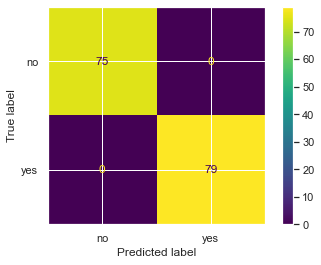

In [45]:

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(dt, X, y)
plt.show()

# Classification 2 Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr =LogisticRegression()

In [48]:
lr.fit(X,y)

LogisticRegression()

In [49]:
lr_predicted = lr.predict(X_test)
lr_predicted_train = lr.predict(X)


In [50]:
lr_predicted

array(['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'],
      dtype=object)

In [51]:
accuracy_score(lr_predicted, y_test)

0.58

In [52]:
f1_score(y_test,lr_predicted,average='macro')

0.5784825371336813

In [53]:
f1_score(y,lr_predicted_train,average='macro')

0.8895684818829881

In [54]:
confusion_matrix(y_test, lr_predicted)

array([[16,  6],
       [15, 13]], dtype=int64)

In [55]:
accuracy_score(y_test,lr_predicted)

0.58

In [56]:
accuracy_score(y,lr_predicted_train)

0.8896103896103896

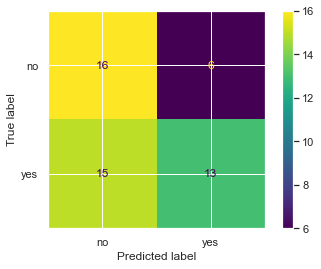

In [57]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

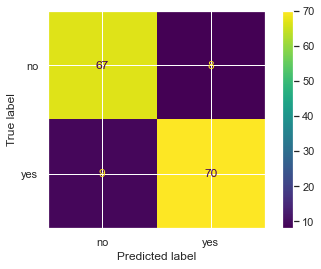

In [58]:
plot_confusion_matrix(lr, X, y)
plt.show()

# General Analysis

Analysing the linear separability of various features of test and training set. We can see from the decision tree model above that drought_code and rainfall has the most information gain. So we'll check if those features are lineraly separable.

<AxesSubplot:ylabel='rainfall'>

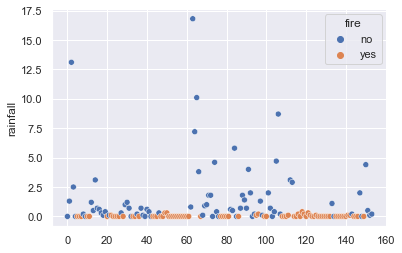

In [59]:
sns.scatterplot(list(range(154)),
train_set['rainfall'], hue=train_set['fire'])

<AxesSubplot:ylabel='rainfall'>

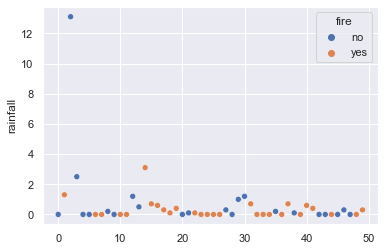

In [60]:
sns.scatterplot(list(range(50)),
test_set['rainfall'], hue=test_set['fire'])   

<AxesSubplot:ylabel='rainfall'>

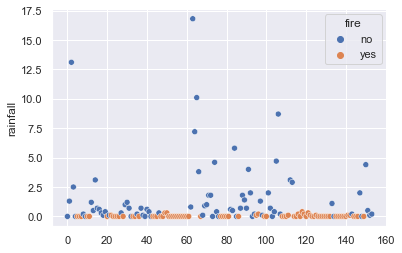

In [61]:
sns.scatterplot(list(range(len(train_set))),
train_set['rainfall'], hue=train_set['fire'])

<AxesSubplot:ylabel='rainfall'>

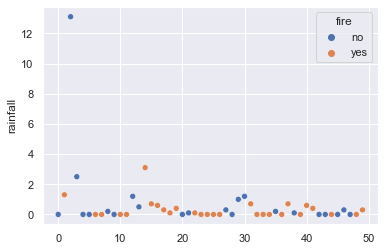

In [62]:
sns.scatterplot(list(range(len(test_set))),
test_set['rainfall'], hue=test_set['fire'])

As we can see, a line can be drawn to seperate it to some extend and with the addition of the rest of the features, the linear seperability will increase and hence we are able to get an accuracy of about 90% on the test data.